# 筛选可用数据

In [7]:
import pandas as pd
import arrow
df_hu_ning = pd.read_csv('./data/HuNing-2016-12-21.csv',encoding='utf-8')
df_hu_ning.tail()

CParserError: Error tokenizing data. C error: out of memory

In [2]:
df_hu_ning = pd.read_csv('./data/HuNing-2016-12-21.csv',names=[u'train_no',
                                                               u'station_train_code',
                                                               u'from_station_name',
                                                               u'to_station_name',
                                                               u'start_time',
                                                               u'swz_num',
                                                               u'tz_num',
                                                               u'zy_num',
                                                               u'ze_num',
                                                               u'wz_num',
                                                               u'record_date',
                                                               u'record_time',]
                         ,encoding='utf-8')
df_hu_ning.tail()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
2412835,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:20
2412836,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:21
2412837,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412838,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:24
2412839,550000D30661,D306,苏州,南京,23:14,0,0,0,3,0,2016-12-21,23:25


## 上海至南京一天内的余票数据

In [3]:
df_SH_NJ = df_hu_ning.copy()
df_SH_NJ = df_SH_NJ[(df_SH_NJ['from_station_name'] == u'上海') & (df_SH_NJ['to_station_name'] == u'南京')]
df_SH_NJ['all_tickets'] = df_SH_NJ['swz_num'] + df_SH_NJ[u'tz_num'] +\
df_SH_NJ[u'zy_num']  + df_SH_NJ[u'ze_num'] + df_SH_NJ[u'wz_num'] 

In [6]:
df_SH_NJ

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,all_tickets
740,55000G703240,G7032,上海,南京,06:18,0,0,26,0,116,2016-12-21,00:00,142
748,55000G700261,G7002,上海,南京,07:00,0,17,8,3,292,2016-12-21,00:00,320
751,55000G703450,G7034,上海,南京,07:05,0,0,39,106,168,2016-12-21,00:00,313
764,55000G700482,G7004,上海,南京,08:00,0,0,0,0,217,2016-12-21,00:00,217
767,55000G703670,G7036,上海,南京,08:10,9,0,0,0,135,2016-12-21,00:00,144
780,55000G700651,G7006,上海,南京,09:00,0,0,1,40,294,2016-12-21,00:00,335
782,55000G703850,G7038,上海,南京,09:05,0,0,24,237,168,2016-12-21,00:00,429
793,55000G704080,G7040,上海,南京,09:48,0,0,30,362,168,2016-12-21,00:00,560
795,55000G700865,G7008,上海,南京,10:00,0,10,0,430,294,2016-12-21,00:00,734
797,55000G704290,G7042,上海,南京,10:09,7,0,6,332,147,2016-12-21,00:00,492


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_SH_NJ.plot(kind='bar',y='all_tickets', x ='start_time',figsize=(14,5), legend=False,fontsize=6)
plt.xlabel(u'时 间(2016-12-21 06:00—23:00)',size=10)
plt.ylabel(u'上下客流量值（单位：人）',size=10)
plt.title(u'苏州地区站点（上海——南京）\n',size=10)
plt.show()

MemoryError: 

## 1. 筛选列出运行时间段数据

> 上海——南京，最早发车时间为06:02，最后一个区间是	22:43  G7128  镇江至南京，<br>
> 南京——上海，最早发车时间为03:30，最后一个区间是	22:43  G7128  镇江至南京，

In [5]:
df_hu_ning2 = df_hu_ning[(df_hu_ning['start_time'].str.contains("0[6-9]:|1[0-9]:|2[0-3]:"))]

In [6]:
print df_hu_ning2[['station_train_code','from_station_name','start_time']].sort_values(by='start_time',ascending=True).head(1)
print df_hu_ning2[['station_train_code','from_station_name','start_time']].sort_values(by='start_time',ascending=True).tail(1)

       station_train_code from_station_name start_time
626800              G7072                上海      06:02
        station_train_code from_station_name start_time
2412839               D306                苏州      23:14


## 2. 筛选出发车时间前30分钟的余票信息

#### 小记录：开车前30分钟(test)

In [7]:
import arrow

In [8]:
df_hu_ning2.head()

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time
0,55000G703240,G7032,上海,昆山南,06:18,0,0,35,358,164,2016-12-21,00:00
1,55000G7076A0,G7076,上海,昆山南,06:23,0,0,10,124,166,2016-12-21,00:00
2,5l000D300220,D3002,上海虹桥,昆山南,06:32,0,0,189,990,156,2016-12-21,00:00
3,5l000D220651,D2206,上海虹桥,昆山南,06:38,0,0,196,963,156,2016-12-21,00:00
4,5l000D307230,D3072,上海虹桥,昆山南,06:50,0,0,176,851,156,2016-12-21,00:00


In [24]:
time_choose = '06:32'
print time_choose

time_before_30m = arrow.get(time_choose,'HH:mm').replace(minutes=-30).format('HH:mm')
print time_before_30m

06:32
06:02


In [ ]:
df_hu_ning2['start_time'].apply(lambda x: arrow.get(x, 'HH:mm').replace(minutes=-30).format('HH:mm')).head()

#### 添加列，记录开车前30分钟数据

In [10]:
df_hu_ning2['start_time_before30m'] = df_hu_ning2['start_time'].apply(lambda x: arrow.get(x, 'HH:mm')\
                                                      .replace(minutes=-30).format('HH:mm'))
df_hu_ning2.head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
0,55000G703240,G7032,上海,昆山南,06:18,0,0,35,358,164,2016-12-21,00:00,05:48
1,55000G7076A0,G7076,上海,昆山南,06:23,0,0,10,124,166,2016-12-21,00:00,05:53
2,5l000D300220,D3002,上海虹桥,昆山南,06:32,0,0,189,990,156,2016-12-21,00:00,06:02
3,5l000D220651,D2206,上海虹桥,昆山南,06:38,0,0,196,963,156,2016-12-21,00:00,06:08
4,5l000D307230,D3072,上海虹桥,昆山南,06:50,0,0,176,851,156,2016-12-21,00:00,06:20


#### 记录时间==发车前30分钟数据，（高价值数据）

In [11]:
df_hu_ning3 = df_hu_ning2[df_hu_ning2['start_time_before30m'] == df_hu_ning2['record_time']]
print len(df_hu_ning3)

2814


In [12]:
df_hu_ning3[df_hu_ning3['station_train_code'] == 'G7072']

,train_no,station_train_code,from_station_name,to_station_name,start_time,swz_num,tz_num,zy_num,ze_num,wz_num,record_date,record_time,start_time_before30m
934301,55000G707270,G7072,上海,无锡,06:02,19,0,44,222,294,2016-12-21,05:32,05:32
934459,55000G707270,G7072,上海,常州,06:02,19,0,44,192,294,2016-12-21,05:32,05:32
934598,55000G707270,G7072,上海,丹阳,06:02,19,0,44,181,294,2016-12-21,05:32,05:32
934662,55000G707270,G7072,上海,镇江,06:02,19,0,44,128,294,2016-12-21,05:32,05:32
934768,55000G707270,G7072,上海,南京南,06:02,19,0,47,121,294,2016-12-21,05:32,05:32
1041391,55000G707270,G7072,无锡,常州,06:40,19,0,45,189,294,2016-12-21,06:10,06:10
1041509,55000G707270,G7072,无锡,丹阳,06:40,19,0,45,179,294,2016-12-21,06:10,06:10
1041567,55000G707270,G7072,无锡,镇江,06:40,19,0,45,129,294,2016-12-21,06:10,06:10
1041658,55000G707270,G7072,无锡,南京南,06:40,19,0,48,119,294,2016-12-21,06:10,06:10
1087206,55000G707270,G7072,常州,丹阳,06:56,19,0,45,179,294,2016-12-21,06:26,06:26


## 3. 加一条列，记录起止站数据，便于后续区间判断

In [13]:
df_hu_ning3['from_to'] = df_hu_ning3['from_station_name'] + ',' +df_hu_ning3['to_station_name']
df_hu_ning3['from_to'] = df_hu_ning3['from_to'].str.split(',')

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
type(df_hu_ning3['from_to'][1087331])

list

In [18]:
df_hu_ning3.columns

Index([            u'train_no',   u'station_train_code',
          u'from_station_name',      u'to_station_name',
                 u'start_time',              u'swz_num',
                     u'tz_num',               u'zy_num',
                     u'ze_num',               u'wz_num',
                u'record_date',          u'record_time',
       u'start_time_before30m',              u'from_to'],
      dtype='object')

In [23]:
df_SH_NJ = df_hu_ning3[(df_hu_ning3['from_station_name'] == u'上海') & (df_hu_ning3['to_station_name'] == u'南京')]

In [24]:
df_SH_NJ['all_tickets'] = df_SH_NJ['swz_num'] + df_SH_NJ[u'tz_num'] +\
df_SH_NJ[u'zy_num']  + df_SH_NJ[u'ze_num'] + df_SH_NJ[u'wz_num'] 

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
df_SH_NJ

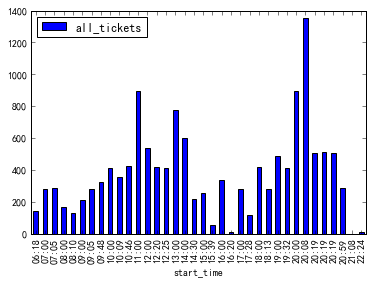

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
df_SH_NJ.plot(kind='bar',y='all_tickets', x ='start_time')

## 4. 导出数据（建议导出为JSON)

In [43]:
df_hu_ning3.to_json('./data/hu_ning_ft1.json')